In [3]:
%load_ext autoreload
%autoreload 2

from functools import partial

from collections import OrderedDict

from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.distributions as dist

from sklearn.decomposition import PCA

import numpy as np
import pandas as pd

import seaborn as sn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

from datasets import *

In [6]:
x = -torch.rand((256, 84))
z = torch.rand((256, 84))

torch.cat((x, z), dim=1).shape

torch.Size([256, 168])

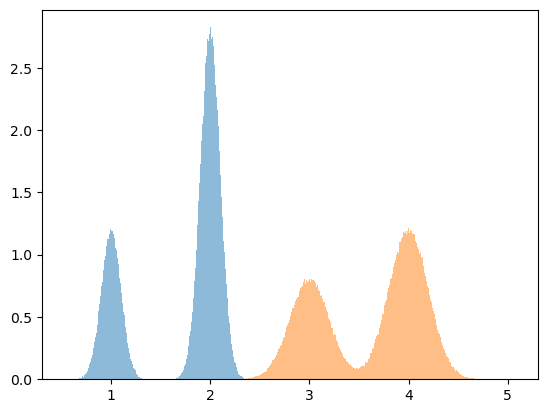

In [2]:
class GaussianMixture():
    def __init__(self, mean, std, weight):
        self.mean = mean
        self.std = std
        self.weight = weight

        self.gaussians = [[dist.Normal(m, s) for m, s in zip(mean_row, std_row)] for mean_row, std_row in zip(mean, std)]
        
    def sample(self, num_samples):
        num_components = len(self.gaussians[0])
        num_rows = len(self.gaussians)
        
        # initialize tensor to hold the samples
        samples = torch.empty((num_rows, num_samples))
        
        # for each row
        for i in range(num_rows):
            # sample component indices according to the mixture weights
            indices = dist.Categorical(self.weight[i]).sample((num_samples,))
            
            # for each component, draw the samples from the appropriate gaussian
            for j in range(num_components):
                mask = (indices == j)
                samples[i, mask] = self.gaussians[i][j].sample((mask.sum(),))
        
        return samples


mean = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
std = torch.tensor([[0.1, 0.1], [0.2, 0.2]])
weight = torch.tensor([[0.3, 0.7], [0.4, 0.6]])
gmm = GaussianMixture(mean=mean, std=std, weight=weight)

samples = gmm.sample(1000000)

# Plot the samples
for i in range(samples.shape[0]):
    plt.hist(samples[i].numpy(), bins=1000, density=True, alpha=0.5)

plt.show()

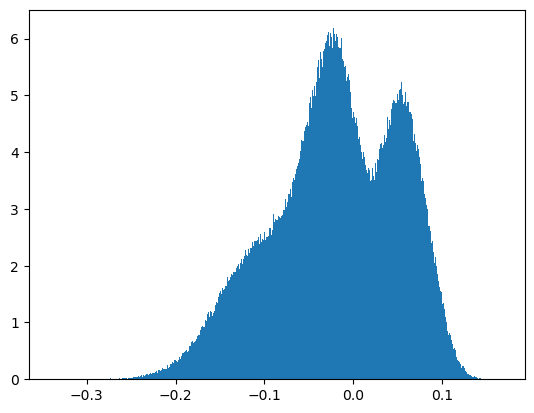

In [14]:
mean = 6
sig = 1.6
theta = np.pi
phi = 0.25

mix = GaussianMixture(torch.tensor([[-0.1, -0.02, 0.05, 0.08]]), torch.tensor([[0.05, 0.03, 0.02, 0.02]]), torch.tensor([[3, 4, 2, 1]]))
samples = mix.sample(1000000)

plt.hist(samples[0].numpy(), bins=1000, density=True)
plt.show()

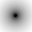

In [13]:
img_coor = torch.Tensor([(i, j) for i in range(32) for j in range(32)])
center = torch.tensor([15, 15])
mean = 

centered = img_coor - center
radius = torch.log(torch.linalg.norm(centered, dim=1))

mean = torch.full((1,), 0.)
std = torch.full((1,), mean)


Image.fromarray((radius * 255 / radius.max()).reshape((32, 32)).numpy().astype(np.uint8))

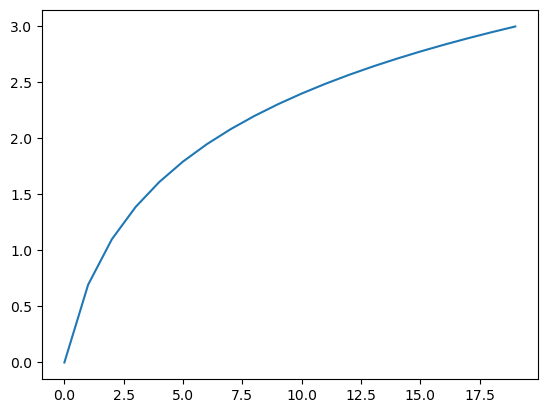

In [12]:
x = np.arange(0, 20, 1)
y = np.log(x + 1)

plt.plot(x, y)
plt.show()

In [4]:
z = torch.zeros((128, 28))

for i in range(5):
    z = torch.cat((z, z), dim=1)
    print(z.shape)

torch.Size([128, 56])
torch.Size([128, 112])
torch.Size([128, 224])
torch.Size([128, 448])
torch.Size([128, 896])


In [2]:
total_img_loss = 0.
img_loss = 100
print_step = 10
count = 0.
for i in range(10000):
    total_img_loss += img_loss / print_step
    count += 1

print(total_img_loss / count)

10.0


In [7]:
L = nn.ModuleList([nn.Linear(8, 8), None])

x = torch.zeros((128, 8))

for mod in L:
    x = mod(x)

x

TypeError: 'NoneType' object is not callable

In [6]:
t = torch.zeros(128)

t.reshape(-1, 1).shape

torch.Size([128, 1])

In [21]:
x = torch.rand((128,))
x.reshape(128, 1).shape

torch.Size([128, 1])

In [16]:
x = torch.rand((128, 1, 32, 32))
x.shape

x = nn.Conv2d(1, 2, 5, 2, 1)(x)
print(x.shape)

x = nn.Conv2d(2, 4, 3, 2, 1)(x)
print(x.shape)

x = nn.Conv2d(4, 8, 3, 2, 1)(x)
print(x.shape)

x = nn.Conv2d(8, 16, 3, 2, 1)(x)
print(x.shape)

torch.Size([128, 2, 15, 15])
torch.Size([128, 4, 8, 8])
torch.Size([128, 8, 4, 4])
torch.Size([128, 16, 2, 2])


In [3]:
torch.zeros((8192, 1024)).mean(dim=0).shape

torch.Size([1024])

In [9]:
x = torch.zeros((128, 1024))
kl = torch.zeros((128, 1024))

for i in range(1024):
    xi, kli = self.pixels[i](X[:, :, i])
    x[:, i] = xi.squeeze()
    kl[:, i] = kli.squeeze()


(torch.Size([1024, 128, 1]), torch.Size([1024, 128, 1]))

In [7]:
X = torch.zeros((4, 28))
true_target = torch.ones((4, 1024))

X_expanded = X.unsqueeze(-1).expand(-1, -1, 1024)

output = torch.cat((X_expanded, true_target.unsqueeze(1)), dim=1)
output[:, :, 0]

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [8]:
data_size = 2_097_152
data_gen = single_random_ring(N=32)
X, y = data_gen.generate_dataset(data_size=data_size, noise=True, sigma=0.3, features_degree=2, seed=42, device='cpu', test_return=False)
data_gen.noise_delta

{'mse_loss': {'mean': 0.003375522093847394, 'std': 0.0009824438020586967},
 'l1_loss': {'mean': 0.017874665558338165, 'std': 0.004685965832322836}}

In [17]:
a = torch.randint(8, 16, (10,))
b = torch.randint(8, 16, (10,))

torch.concat([a.reshape(-1, 1), b.reshape(-1, 1)], dim=1)

tensor([[13, 15],
        [11,  9],
        [14, 11],
        [10,  9],
        [ 8, 15],
        [12, 10],
        [12, 10],
        [13, 10],
        [ 8, 12],
        [ 8,  8]])

In [5]:
target = torch.rand((256, 32, 32))
pred = torch.rand((256, 32, 32))

torch.min(torch.sum(torch.pow(target - pred, 2), dim=0)).shape

torch.Size([])

In [2]:
def save_txt(txt, path):
    with open(path, 'w') as f:
        f.write(txt)

In [13]:
target = torch.rand((256, 32, 32))
pred = torch.rand((256, 32, 32))

torch.abs((pred - target).reshape(256, 1024)).min(dim=1).values.shape

torch.Size([256])

In [28]:
input_size, output_size = 2, 32
factor = (output_size / input_size)**(1/3)

for i in range(8):
    print(int(input_size * factor**i))

2
5
12
32
80
203
512
1290


In [18]:
data_size = 64_000
data_gen = single_random_ring(N=32)
X, y = data_gen.generate_dataset(data_size=data_size, noise=True, sigma=0.3, features_degree=1, seed=42, device='cpu', test_return=True)

In [20]:
pca95 = PCA(n_components=0.95)
transformed = pca95.fit_transform(X)

X.shape, transformed.shape

((64000, 84), (64000, 6))

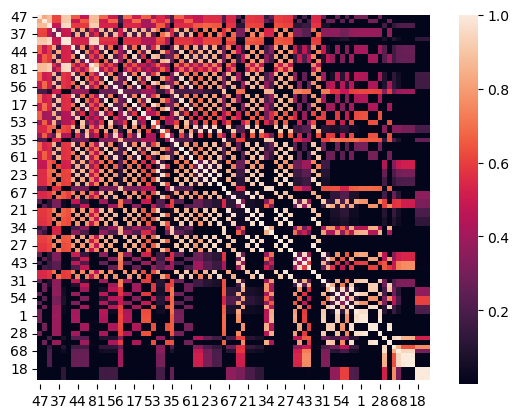

In [24]:
df = pd.DataFrame(X)

corr_matrix = df.corr().abs()

# Compute the sum of correlations for each column
sum_corr = corr_matrix.sum()

# Sort index by the sum of correlations
sorted_index = sum_corr.sort_values(ascending=False).index

# Reorder the correlation matrix
sorted_corr_matrix = corr_matrix.reindex(sorted_index).reindex(sorted_index, axis=1)

# Display a heatmap
sn.heatmap(sorted_corr_matrix, annot=False)
plt.show()

In [3]:
df.sort_values('final_train_loss')

,unconv_1,unconv_2,unconv_3,num_parameters,speed,final_train_loss,final_test_loss,total_time,total_epoch,epoch_per_hour
18,BottleNeck,Conv3x3x3NormAct,Conv3x3x3NormAct,18947824,74.33,0.000011,7.000000e+00,1h 32min,13,24.562834
36,Conv3x11x3NormAct,Conv3x3x3NormAct,Conv3x3x3NormAct,19863152,68.57,0.000012,7.500000e-08,1h 31min,12,23.316511
29,BottleNeck,Conv3x11x3NormAct,Conv3x11x3NormAct,18887346,55.12,0.000013,8.600000e-08,1h 31min,10,19.632372
23,LinearBottleNeck,BottleNeck,Conv3x11x3NormAct,18658034,57.12,0.000013,8.800000e-08,1h 30min,11,21.742066
20,LinearBottleNeck,LinearBottleNeck,Conv3x11x3NormAct,18658034,74.03,0.000013,8.100000e-08,1h 31min,12,22.998134
...,...,...,...,...,...,...,...,...,...,...
40,Conv3x3x3NormAct,LinearBottleNeck,Conv3x11x3NormAct,19768689,71.51,2.000000,1.200000e-07,1h 30min,12,23.902642
19,Conv3x11x3NormAct,LinearBottleNeck,LinearBottleNeck,19515794,74.77,2.000000,1.300000e-07,1h 31min,12,23.605195
10,BottleNeck,BottleNeck,LinearBottleNeck,18600466,80.51,3.000000,1.900000e-07,1h 32min,13,24.430362
11,LinearBottleNeck,BottleNeck,BottleNeck,18600466,77.41,4.000000,2.600000e-07,1h 30min,12,23.839435


In [2]:
import pandas as pd
import re

# Initialize empty lists for each column in the dataframe
indexes = []
unconv_1 = []
unconv_2 = []
unconv_3 = []
num_parameters = []
speed = []
final_train_loss = []
final_test_loss = []
total_time = []
total_epoch = []
epoch_per_hour = []

# Open and read the text file
with open("../grid_search_0.stdout", "r") as file:
    for line in file:
        if "Testing model_" in line:
            indexes.append(int(re.findall(r'\d+', line)[0]))
        if "unconv_1" in line:
            unconv_1.append(line.split(": ")[1].strip()[:-1])
        if "unconv_2" in line:
            unconv_2.append(line.split(": ")[1].strip()[:-1])
        if "unconv_3" in line:
            unconv_3.append(line.split(": ")[1].strip()[:-1])
        if "Number of trainable parameters" in line:
            num_parameters.append(int(re.findall(r'[\d,]+', line)[0].replace(',', '')))
        if " - speed" in line and "loss" not in line:
            speed.append(float(re.findall(r"[-+]?\d*\.\d+|\d+", line)[0]))
        if " - final train loss:" in line:
            final_train_loss.append(float(re.findall(r"[-+]?\d*\.\d+e-\d+|\d+", line)[0]))
        if " - final test loss:" in line:
            final_test_loss.append(float(re.findall(r"[-+]?\d*\.\d+e-\d+|\d+", line)[0]))
        if " - total time:" in line:
            total_time.append(line.split(": ")[1].strip())
        if " - total epoch:" in line:
            total_epoch.append(int(re.findall(r'\d+', line)[0]))
        if " - epoch per hour:" in line:
            epoch_per_hour.append(float(re.findall(r"[-+]?\d*\.\d+|\d+", line)[0]))

# Create a dictionary of lists
N = len(speed)
data = {"unconv_1": unconv_1[:N], "unconv_2": unconv_2[:N], "unconv_3": unconv_3[:N], "num_parameters": num_parameters[:N],
        "speed": speed[:N], "final_train_loss": final_train_loss[:N], "final_test_loss": final_test_loss[:N],
        "total_time": total_time[:N], "total_epoch": total_epoch[:N], "epoch_per_hour": epoch_per_hour[:N]}

# Create pandas DataFrame from the dictionary
df = pd.DataFrame(data, index=indexes[:N])

# Print the DataFrame
df


,unconv_1,unconv_2,unconv_3,num_parameters,speed,final_train_loss,final_test_loss,total_time,total_epoch,epoch_per_hour
1,Conv3x3x3NormAct,BottleNeck,Conv3x11x3NormAct,19768689,71.82,0.000018,1.200000e-07,1h 31min,12,22.922747
2,Conv3x3x3NormAct,LinearBottleNeck,BottleNeck,19711121,77.78,0.000025,1.700000e-07,1h 31min,13,25.193419
3,LinearBottleNeck,Conv3x11x3NormAct,Conv3x3x3NormAct,18899313,69.17,0.000027,1.200000e-07,1h 31min,11,21.520649
4,BottleNeck,Conv3x11x3NormAct,Conv3x3x3NormAct,18899313,71.45,0.000042,2.400000e-07,1h 32min,12,22.594669
5,Conv3x11x3NormAct,LinearBottleNeck,Conv3x11x3NormAct,19573362,68.58,0.000025,1.500000e-07,1h 31min,11,21.210473
...,...,...,...,...,...,...,...,...,...,...
60,Conv3x3x3NormAct,Conv3x11x3NormAct,LinearBottleNeck,19940433,31.75,0.000031,2.300000e-07,1h 32min,6,11.317179
61,LinearBottleNeck,Conv3x3x3NormAct,LinearBottleNeck,18878289,32.92,0.000065,4.200000e-07,1h 31min,6,11.671763
62,Conv3x3x3NormAct,BottleNeck,Conv3x3x3NormAct,19780656,31.57,0.000033,1.800000e-07,1h 32min,6,11.279715
63,BottleNeck,BottleNeck,Conv3x11x3NormAct,18658034,30.54,0.000036,2.000000e+00,1h 34min,6,10.531033


In [11]:
np.random.choice([0, 1, 2, 3], size=3)

array([3, 0, 0])

In [16]:
[0, 0, 0] not in [[0, 0, 0], [1, 0, 1], [15, 5, 155]]

False

In [17]:
models = []
while len(models) < 64:
    seq = list(np.random.choice([0, 1, 2, 3], size=3))
    if seq not in models:
        models.append(seq) 

In [65]:
class LastConv(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, padding, output_size):
        super(LastConv, self).__init__()
        self.output_size = output_size
        self.convT = nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride, padding)
    
    def forward(self, x):
        return self.convT(x, self.output_size)

In [66]:
x = torch.ones((20, 32, 32))
seq = nn.Sequential(LastConv(20, 20, 5, stride=2, padding=3, output_size=(61, 61)))
seq(x).shape

torch.Size([20, 61, 61])

In [39]:
input = 6
output = 2048
n_layers = 5
factor = (2048/6)**(1/5)

test = []
for i in range(n_layers):
    test.append((int(input * factor**i), int(input * factor**(i+1))))

test

[(6, 19), (19, 61), (61, 198), (198, 637), (637, 2048)]

In [43]:
x = torch.Tensor([[1, 1, 1, 1, 1, 1]])

x = nn.Linear(6, 128)(x)
x = nn.Linear(128, 256)(x)
x = nn.Linear(256, 512)(x)
x = nn.Linear(512, 1024)(x)
x = nn.Linear(1024, 3200)(x)

x = x.view(1, 32, 10, 10)

x = nn.ConvTranspose2d(
    in_channels=32,
    out_channels=32,
    kernel_size=(3, 1),
    stride=1,
    padding=(1, 0)
)(x)
print(1, x.shape)

x = nn.ConvTranspose2d(
    in_channels=32,
    out_channels=32,
    kernel_size=(1, 3),
    stride=1,
    padding=(0, 1)
)(x)
print(2, x.shape)

1 torch.Size([1, 32, 10, 10])
2 torch.Size([1, 32, 10, 10])


In [64]:
x = torch.Tensor([[1, 1, 1, 1, 1, 1]])

x = nn.Linear(6, 128)(x)
x = nn.Linear(128, 256)(x)
x = nn.Linear(256, 512)(x)
x = nn.Linear(512, 1024)(x)
x = nn.Linear(1024, 4000)(x)

x = x.view(1, 1000, 2, 2)

x = nn.ConvTranspose2d(
    in_channels=1000,
    out_channels=1000,
    kernel_size=1,
    stride=2,
    padding=0,
    output_padding=0,
    groups=1000
)(x)
print(1, x.shape)

x = nn.ConvTranspose2d(
    in_channels=1000,
    out_channels=500,
    kernel_size=1,
    stride=2,
    padding=0,
    output_padding=0,
)(x)
print(2, x.shape)

x = nn.ConvTranspose2d(
    in_channels=500,
    out_channels=250,
    kernel_size=1,
    stride=2,
    padding=1,
    output_padding=0,
)(x)
print(3, x.shape)

x = nn.ConvTranspose2d(
    in_channels=250,
    out_channels=250,
    kernel_size=2,
    stride=2,
    padding=2,
    output_padding=0,
)(x)
print(4, x.shape)

x = nn.ConvTranspose2d(
    in_channels=250,
    out_channels=250,
    kernel_size=2,
    stride=2,
    padding=2,
    output_padding=0,
)(x)
print(5, x.shape)

x = nn.ConvTranspose2d(
    in_channels=250,
    out_channels=250,
    kernel_size=5,
    stride=2,
    padding=2,
    output_padding=1,
)(x)
print(6, x.shape)

1 torch.Size([1, 1000, 3, 3])
2 torch.Size([1, 500, 5, 5])
3 torch.Size([1, 250, 7, 7])
4 torch.Size([1, 250, 10, 10])
5 torch.Size([1, 250, 16, 16])
6 torch.Size([1, 250, 32, 32])


In [152]:
class GaussianLoss(nn.Module):
    def __init__(self, N, sigma=0.3):
        super(GaussianLoss, self).__init__()

        self.sigma = torch.full((N, N), sigma)

    def forward(self, pred, target):
        non_zero_sigma = self.sigma * target + 1e-3
        distr = torch.distributions.Normal(target, non_zero_sigma)

        bound_1 = distr.cdf(pred)
        bound_2 = distr.cdf(2 * target - pred)
        log = 1 - torch.abs(bound_1 - bound_2)
        
        log_prob = torch.log(log).nan_to_num() * non_zero_sigma

        loss = -torch.mean(log_prob)

        return loss

In [10]:
class LogL1(nn.Module):
    def __init__(self):
        super(LogL1, self).__init__()

    def forward(self, pred, target):
        l1_loss = 1 - F.l1_loss(pred, target) / 2

        log_l1_loss = -torch.mean(torch.log(l1_loss))

        return log_l1_loss

In [15]:
N = 4
pred = torch.full((N, N), 0.0001)
target = torch.full((N, N), 0)

loss = LogL1()

loss.forward(pred, target)

tensor(5.0010e-05)

In [9]:
a = torch.zeros((32, 1024))
b = torch.zeros((32, 6))

torch.concat([a, b], dim=1).shape

torch.Size([32, 1030])

In [77]:
data_gen = multi_randomized_ring_dataset()
features, imgs = data_gen.generate_dataset(data_size=10000, batch_size=32, test_return=True)

In [78]:
type(imgs[0][0][0])

numpy.float16

[0.2002 0.333  0.8984 0.4424 0.906  0.8584 0.     0.     0.     0.
 0.     0.    ]


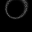

In [101]:
idx = np.random.choice(10000)
img = imgs[idx]
print(features[idx])
Image.fromarray((img * 255 / imgs.max()).astype(np.uint8))

In [117]:
x_1 = torch.zeros((32, 54))
x_2 = torch.zeros((32, 54))
torch.cat((x_1, x_2), dim=1).shape

torch.Size([32, 108])

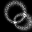

In [46]:
val = np.arange(0, 2, 0.01)
distr = np.exp(-(val - 1)**2 / 0.3**2)

kernel = np.array([np.random.choice(val, size=32, p=distr / distr.sum()) for _ in range(32)])

img1 = data_gen.gaussian_from_features(20, 18, 6, 1.6, -1.8, 0.5)
img2 = data_gen.gaussian_from_features(15, 15, 9, 1.6, 0, 0.3)
Image.fromarray(((img1 + img2) * kernel * 255 / 2.2).astype(np.uint8))

In [50]:
particle_1 = np.array([np.random.choice([0, 1]) for _ in range(10)], dtype=np.bool)
particle_2 = np.array([np.random.choice([0, 1]) for _ in range(10)], dtype=np.bool)
particle_1 = particle_1 ^ particle_2
print(particle_1)
print(particle_2)

[False False False False  True False False False  True False]
[False False  True False False False  True  True  True  True]


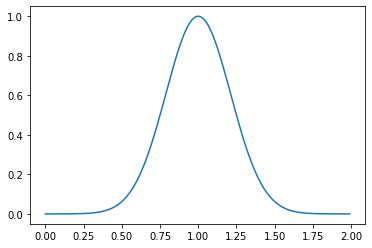

In [43]:
val = np.arange(0, 2, 0.01)
distr = np.exp(-(val - 1)**2 / 0.3**2)
plt.plot(val, distr)
plt.show()

In [2]:
data_gen = pattern_randomized_ring_dataset()
features, imgs = data_gen.generate_dataset(640, test_return=True)

In [14]:
data_gen.gaussian_from_features(15, 15, 9, 3).max()

0.9999999999937501

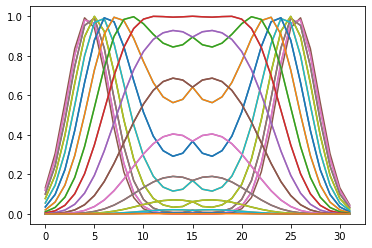

In [4]:
x = data_gen.gaussian_from_features(15, 15, 9, 3)
plt.plot(np.arange(len(x)), x)
plt.show()

4.573722640764776e-17 0.9999995693346577


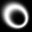

In [81]:
img = data_gen.gaussian_from_features(20, 20, 8, 2.5, np.pi / 4, 0.5)
print(img.min(), img.max())
Image.fromarray(((img - img.min()) * 255 / (img.max() - img.min())).astype(np.uint8))

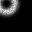

In [49]:
Image.fromarray((imgs[0] * 255 / imgs[0].max()).astype(np.uint8))

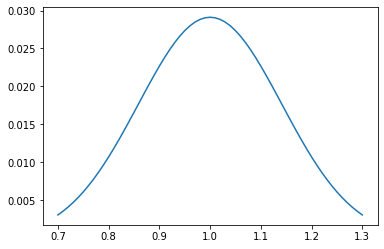

array([[20.8, 26.1, 42. ],
       [31.2, 36.8, 49.5],
       [38. , 43.5, 62.4]])

In [40]:
a = np.array([
    [20, 30, 40],
    [30, 40, 50],
    [40, 50, 60]
])
val = np.arange(0.7, 1.3, 0.01)
distr = np.exp(-(val - 1)**2 / 0.2**2)
plt.plot(val, distr / distr.sum())
plt.show()

kernel = np.array([np.random.choice(val, size=3, p=distr / distr.sum()) for _ in range(3)])

a * kernel

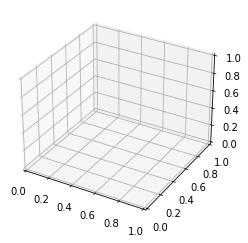

In [4]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

In [28]:
dataset_generator = randomized_ring_dataset(N=32)
imgs = dataset_generator.generate_dataset(test_return=True)

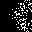

In [29]:
Image.fromarray(imgs[np.random.choice(10000)])

In [85]:
distr, (means, nrgs,), (pmt, center, sig), features = dataset_generator.prob_distr(means=dataset_generator.means, nrgs=dataset_generator.nrgs)

In [86]:
X, Y, Z = axes3d.get_test_data(0.05)
X, Y, Z

(array([[-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
        [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
        [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
        ...,
        [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
        [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
        [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5]]),
 array([[-30. , -30. , -30. , ..., -30. , -30. , -30. ],
        [-29.5, -29.5, -29.5, ..., -29.5, -29.5, -29.5],
        [-29. , -29. , -29. , ..., -29. , -29. , -29. ],
        ...,
        [ 28.5,  28.5,  28.5, ...,  28.5,  28.5,  28.5],
        [ 29. ,  29. ,  29. , ...,  29. ,  29. ,  29. ],
        [ 29.5,  29.5,  29.5, ...,  29.5,  29.5,  29.5]]),
 array([[-0.00982064, -0.0113957 , -0.01319036, ..., -0.01522953,
         -0.01319036, -0.0113957 ],
        [-0.0113957 , -0.01322338, -0.01530587, ..., -0.01767209,
         -0.01530587, -0.01322338],
        [-0.01319036, -0.01530587, -0.01771632, ..., -0.02045518,
         -0.0177

In [87]:
means = np.expand_dims(means, axis=1).repeat(repeats=distr.shape[1], axis=1)
nrgs = np.expand_dims(nrgs, axis=0).repeat(repeats=distr.shape[0], axis=0)

In [89]:
distr

array([[2.58315837e-43, 3.59616166e-43, 4.65981510e-43, 5.67281839e-43,
        6.73647184e-43, 7.74947512e-43, 8.81312857e-43, 9.82613185e-43],
       [3.43137948e-38, 4.77701849e-38, 6.18993945e-38, 7.53557846e-38,
        8.94849943e-38, 1.02941384e-37, 1.17070594e-37, 1.30526984e-37],
       [2.08686282e-33, 2.90524040e-33, 3.76453685e-33, 4.58291443e-33,
        5.44221089e-33, 6.26058846e-33, 7.11988492e-33, 7.93826250e-33],
       [5.81067373e-29, 8.08936931e-29, 1.04819997e-28, 1.27606952e-28,
        1.51533256e-28, 1.74320212e-28, 1.98246515e-28, 2.21033471e-28],
       [7.40741223e-25, 1.03122798e-24, 1.33623907e-24, 1.62672582e-24,
        1.93173692e-24, 2.22222367e-24, 2.52723476e-24, 2.81772152e-24],
       [4.32328608e-21, 6.01869239e-21, 7.79886901e-21, 9.49427532e-21,
        1.12744519e-20, 1.29698582e-20, 1.47500349e-20, 1.64454412e-20],
       [1.15523110e-17, 1.60826290e-17, 2.08394629e-17, 2.53697810e-17,
        3.01266149e-17, 3.46569329e-17, 3.94137668e-17, 4.

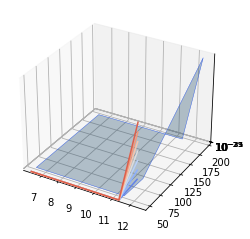

In [93]:
ax = plt.figure().add_subplot(projection='3d')
ax.set_zscale('log')

ax.plot_surface(means, nrgs, distr, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8, alpha=0.3)

ax.contour(means, nrgs, distr, zdir='z', offset=-100, cmap='coolwarm')
ax.contour(means, nrgs, distr, zdir='x', offset=-40, cmap='coolwarm')
ax.contour(means, nrgs, distr, zdir='y', offset=40, cmap='coolwarm')

# ax.set(xlim=(-40, 40), ylim=(-40, 40), zlim=(-100, 100),
#        xlabel='means', ylabel='energies', zlabel='PMT')

plt.show()

In [65]:
def create_ring_img(N, center, inner, outer):
    img_coor = [[(i, j) for i in range(N)] for j in range(N)]
    radius = np.linalg.norm(np.array(img_coor) - center, axis=2)
    img = torch.zeros(radius.shape, dtype=torch.uint8)
    for i in range(N):
        for j in range(N):
            if radius[i, j] >= inner and radius[i, j] < outer:
                img[i, j] = 255

    return img

In [114]:
def create_ring_img(img_coor, center, inner, outer):
    radius = np.linalg.norm(img_coor - center, axis=2)
    img = np.zeros_like(radius, dtype=np.uint8)
    
    img[np.logical_and(radius >= inner, radius < outer)] = 255

    return img

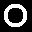

In [115]:
Image.fromarray(create_ring_img(32, 15, 8, 12))

In [55]:
np.array([[(i, j) for i in range(N)] for j in range(N)]).reshape((32*32, 2))

array([[ 0,  0],
       [ 1,  0],
       [ 2,  0],
       ...,
       [29, 31],
       [30, 31],
       [31, 31]])

In [92]:
N = 32
centers = np.array([[(i, j) for i in range(N)] for j in range(N)]).reshape((N * N, 2))
rings = []
for inner in np.arange(N * 0.1, N * 0.4):
    for outer in np.arange(inner + N * 0.05, N * 0.45):
        rings.append((inner, outer))

simple_rings = []
for i in range(10000):
    center = centers[np.random.choice(N * N)]
    inner, outer = rings[np.random.choice(len(rings))]
    simple_rings.append(create_ring_img(N, center, inner, outer))

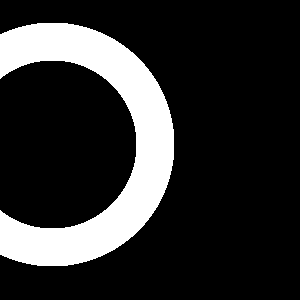

In [90]:
Image.fromarray(simple_rings[2].numpy())

In [29]:
dataset = ring_dataset()
rings = dataset.generate_dataset()

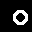

In [59]:
Image.fromarray(dataset.img[np.random.choice(10000)])

In [14]:
np.array([0, 1, 2, 3, 4, 5, 6, 7, 8]).reshape(-1, 1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8]])